# Building A Handwritten Digits Classifier

In [1]:
from sklearn.datasets import load_digits

digits = load_digits()

In [2]:
import pandas as pd
images = pd.DataFrame(digits['data'])
images.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [3]:
labels = pd.Series(digits['target'])
labels.head()

0    0
1    1
2    2
3    3
4    4
dtype: int64

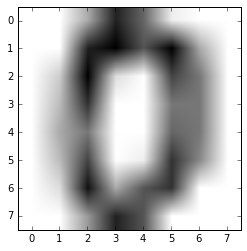

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

first_img = images.iloc[0]
first_img = first_img.values
first_img = first_img.reshape(8,8)
plt.imshow(first_img, cmap='gray_r')

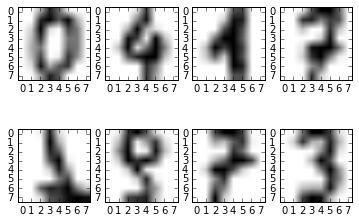

In [5]:
f, ax = plt.subplots(2, 4)

ax[0,0].imshow(images.iloc[0].values.reshape(8,8), cmap='gray_r')
ax[0,1].imshow(images.iloc[100].values.reshape(8,8), cmap='gray_r')
ax[0,2].imshow(images.iloc[200].values.reshape(8,8), cmap='gray_r')
ax[0,3].imshow(images.iloc[300].values.reshape(8,8), cmap='gray_r')

ax[1,0].imshow(images.iloc[1000].values.reshape(8,8), cmap='gray_r')
ax[1,1].imshow(images.iloc[1100].values.reshape(8,8), cmap='gray_r')
ax[1,2].imshow(images.iloc[1200].values.reshape(8,8), cmap='gray_r')
ax[1,3].imshow(images.iloc[1300].values.reshape(8,8), cmap='gray_r')

## K-Nearest Neighbors

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

def train_knn(nneighbors, train_features, train_labels):
    knn = KNeighborsClassifier(n_neighbors = nneighbors)
    knn.fit(train_features, train_labels)
    return knn

def test(model, test_features, test_labels):
    predictions = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = test_labels
    train_test_df['predicted_label'] = predictions
    overall_accuracy = sum(train_test_df["predicted_label"] == train_test_df["correct_label"])/len(train_test_df)    
    return overall_accuracy

def cross_validate(k):
    fold_accuracies = []
    kf = KFold(n_splits = 4, random_state=2)
    for train_index, test_index in kf.split(images):
        train_features, test_features = images.loc[train_index], images.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train_knn(k, train_features, train_labels)
        overall_accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies
        

In [7]:
import numpy as np
k_accuracies = []

for k in range(1, 15):
    accuracies = cross_validate(k)
    mean = np.mean(accuracies)
    k_accuracies.append(mean)

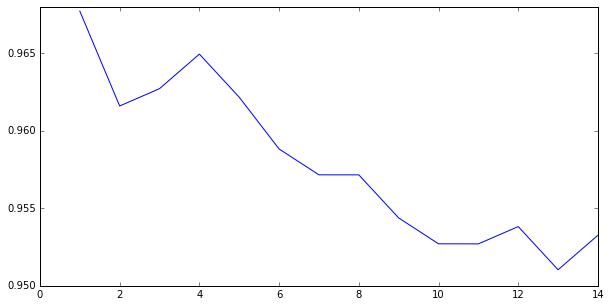

In [8]:
plt.figure(figsize=(10,5))
plt.plot(range(1,15), k_accuracies)

## Neural Network with one hidden layer

In [16]:
from sklearn.neural_network import MLPClassifier

def train_nn(nodes, train_features, train_labels):
    mlp = MLPClassifier(hidden_layer_sizes=nodes)
    mlp.fit(train_features, train_labels)
    
    return mlp

def test_nn(mlp, test_features, test_labels):
    predictions = mlp.predict(test_features)
    test_df = pd.DataFrame()
    test_df['correct_label'] = test_labels
    test_df['predicted_label'] = predictions
    overall_accuracy = sum(test_df["predicted_label"] == test_df["correct_label"])/len(test_df)    
    return overall_accuracy

def cross_validate(nodes):
    kf = KFold(n_splits = 4, random_state=2)
    fold_accuracies = []
    for train_index, test_index in kf.split(images):
        train_features, test_features = images.loc[train_index], images.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
       
        model = train_nn(nodes, train_features, train_labels)
        overall_accuracy = test_nn(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies

In [17]:
nodes = [
    (8,),
    (16,),
    (32,),
    (64,),
    (128,),
    (256,)
]
nn_accuracies = []

for n in nodes:
    accuracies = cross_validate(n)
    mean = np.mean(accuracies)
    nn_accuracies.append(mean)

/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.



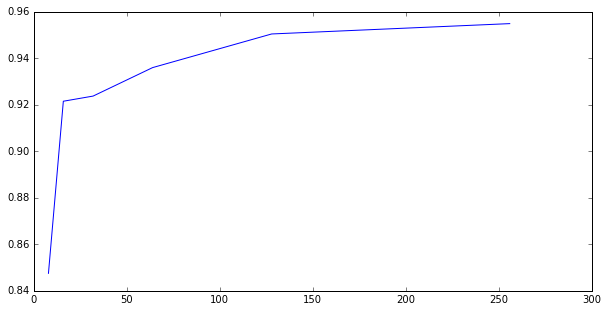

In [18]:
plt.figure(figsize=(10,5))
x = [i[0] for i in nodes]
plt.plot(x, nn_accuracies)

### Summary :

t looks like adding more neurons to the single hidden layer helped massively improved simple accuracy from approximately 86% to approximately 94%. Simple accuracy computes the number of correct classifications the model made, but doesn't tell us anything about false or true positives or false or true negatives.

Given that k-nearest neighbors achieved approximately 96% accuracy, there doesn't seem to be any advantages to using a single hidden layer neural network for this problem

## NN with two hidden layers

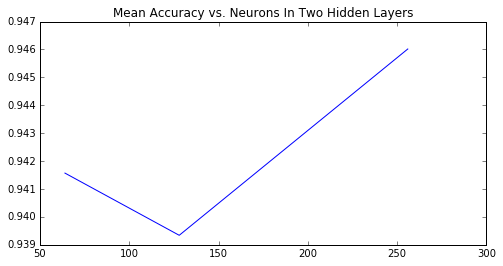

In [19]:
nn_two_neurons = [
    (64,64),
    (128, 128),
    (256, 256)
]
nn_two_accuracies = []

for n in nn_two_neurons:
    nn_accuracies = cross_validate(n)
    nn_mean_accuracy = np.mean(nn_accuracies)
    nn_two_accuracies.append(nn_mean_accuracy)

plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons In Two Hidden Layers")

x = [i[0] for i in nn_two_neurons]
plt.plot(x, nn_two_accuracies)

### Summary :

Using 2 hidden layers improved our simple accuracy to 95%. While I'd traditionally be worried about overfitting, using 4-fold cross validation also gives me a bit more assurance that the model is generalizing to achieve the extra 1% in simple accuracy over the single hidden layer networks we tried earlier.

## NN with three hidden layers

/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.



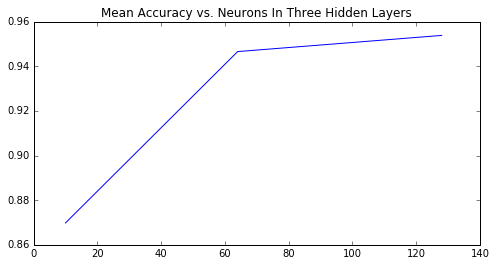

In [21]:
nn_three_neurons = [
    (10, 10, 10),
    (64, 64, 64),
    (128, 128, 128)
]

nn_three_accuracies = []

for n in nn_three_neurons:
    nn_accuracies = cross_validate(n)
    nn_mean_accuracy = np.mean(nn_accuracies)
    nn_three_accuracies.append(nn_mean_accuracy)

plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons In Three Hidden Layers")

x = [i[0] for i in nn_three_neurons]
plt.plot(x, nn_three_accuracies)